In [1]:
#https://keras.io/examples/mnist_cnn/

from __future__ import print_function
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
import time
from matplotlib import pyplot
from ann_visualizer.visualize import ann_viz;



Using TensorFlow backend.


In [2]:
batch_size = 500
num_classes = 10
epochs = 10
num_nodes = [1, 2, 10, 32, 64]
num_layers = [1, 2, 3, 4, 5]


# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# Look at confusion matrix 
#code from SKLEARN website.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

https://machinelearningmastery.com/how-to-control-neural-network-model-capacity-with-nodes-and-layers/

## test number of nodes in simple, dense model

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 0.9700 - acc: 0.7327 - val_loss: 0.4912 - val_acc: 0.8740
Epoch 2/10
 - 2s - loss: 0.4373 - acc: 0.8823 - val_loss: 0.3678 - val_acc: 0.9008
Epoch 3/10
 - 2s - loss: 0.3616 - acc: 0.8983 - val_loss: 0.3292 - val_acc: 0.9077
Epoch 4/10
 - 2s - loss: 0.3284 - acc: 0.9067 - val_loss: 0.3074 - val_acc: 0.9126
Epoch 5/10
 - 2s - loss: 0.3095 - acc: 0.9118 - val_loss: 0.2920 - val_acc: 0.9166
Epoch 6/10
 - 2s - loss: 0.2963 - acc: 0.9155 - val_loss: 0.2852 - val_acc: 0.9191
Epoch 7/10
 - 2s - loss: 0.2879 - acc: 0.9187 - val_loss: 0.2798 - val_acc: 0.9229
Epoch 8/10
 - 2s - loss: 0.2808 - acc: 0.9207 - val_loss: 0.2736 - val_acc: 0.9225
Epoch 9/10
 - 3s - loss: 0.2754 - acc: 0.9221 - val_loss: 0.2735 - val_acc: 0.9230
Epoch 10/10
 - 2s - loss: 0.2711 - acc: 0.9235 - val_loss: 0.2691 - val_acc: 0.9240
nodes=1: Processing time (seconds): 25.022244
nodes=1: Test accuracy: 0.924
Train on 60000 samples, validate on 10000 s

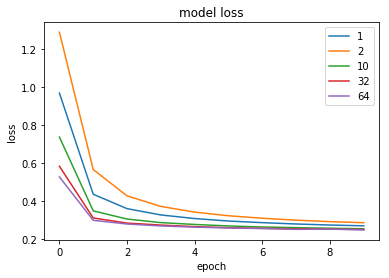

In [14]:
# fit model with given number of nodes, returns test set accuracy
def evaluate_model1(n_nodes, x_train, y_train, x_test, y_test):
    # define model
    model1 = Sequential()
    #first hidden layer
    model1.add(Dense(n_nodes, activation= 'relu', input_shape=(28,28,1)))
    # Flattening the 2D arrays for fully connected layers
    model1.add(Flatten())
    #output layer
    model1.add(Dense(10, activation='softmax'))
    # compile model
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model on train set
    start_time = time.clock()
    history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=epochs, batch_size=batch_size, verbose=2)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    print("nodes=%d: Processing time (seconds): %f" % (n_nodes, runtime))
    # evaluate model on test set
    _, test_acc = model1.evaluate(x_test, y_test, verbose=0)
    return history1, test_acc
              
# evaluate model and plot learning curve with given number of nodes
for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history1, result = evaluate_model1(n_nodes, x_train, y_train, x_test, y_test)
    # summarize final test set accuracy
    print('nodes=%d: Test accuracy: %.3f' % (n_nodes, result))
    # plot learning curve
    pyplot.plot(history1.history['loss'], label=str(n_nodes))
    # show the plot
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
pyplot.legend()
pyplot.show()


## test number of layers in simple, dense model

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.7080 - acc: 0.8315 - val_loss: 0.3719 - val_acc: 0.9008
Epoch 2/10
 - 9s - loss: 0.3486 - acc: 0.9030 - val_loss: 0.3087 - val_acc: 0.9153
Epoch 3/10
 - 10s - loss: 0.3075 - acc: 0.9132 - val_loss: 0.2878 - val_acc: 0.9195
Epoch 4/10
 - 9s - loss: 0.2885 - acc: 0.9185 - val_loss: 0.2775 - val_acc: 0.9226
Epoch 5/10
 - 10s - loss: 0.2776 - acc: 0.9216 - val_loss: 0.2718 - val_acc: 0.9243
Epoch 6/10
 - 10s - loss: 0.2706 - acc: 0.9237 - val_loss: 0.2721 - val_acc: 0.9214
Epoch 7/10
 - 10s - loss: 0.2652 - acc: 0.9251 - val_loss: 0.2686 - val_acc: 0.9252
Epoch 8/10
 - 10s - loss: 0.2624 - acc: 0.9264 - val_loss: 0.2694 - val_acc: 0.9224
Epoch 9/10
 - 10s - loss: 0.2583 - acc: 0.9279 - val_loss: 0.2721 - val_acc: 0.9240
Epoch 10/10
 - 10s - loss: 0.2564 - acc: 0.9289 - val_loss: 0.2641 - val_acc: 0.9249
layers=1: Processing time (seconds): 97.265984
layers=1: Test accuracy: 0.925
Train on 60000 samples, validate 

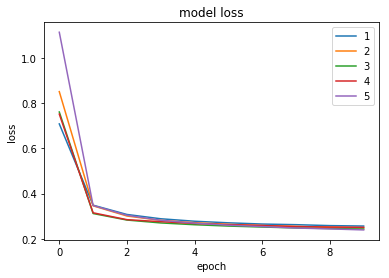

In [8]:
# fit model with given number of layers, returns test set accuracy
def evaluate_model2(n_layers, x_train, y_train, x_test, y_test):
       # define model
    model2 = Sequential()
    model2.add(Dense(10, activation= 'relu', input_shape=(28,28,1)))
    for _ in range(1, n_layers):
        model2.add(Dense(10, activation= 'relu', input_shape=(28,28,1)))
    model2.add(Flatten())
    model2.add(Dense(10, activation='softmax'))
    # compile model
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model on train set
    start_time = time.clock()
    history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=epochs, batch_size=batch_size, verbose=2)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    print("layers=%d: Processing time (seconds): %f" % (n_layers, runtime))
    # evaluate model on test set
    _, test_acc = model2.evaluate(x_test, y_test, verbose=0)
    return history2, test_acc       

# evaluate model and plot learning curve of model with given number of layers
all_history = list()
for n_layers in num_layers:
    # evaluate model with a given number of layers
    history2, result = evaluate_model2(n_layers, x_train, y_train, x_test, y_test)
    print('layers=%d: Test accuracy: %.3f' % (n_layers, result))
    # plot learning curve
    pyplot.plot(history2.history['loss'], label=str(n_layers))
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
pyplot.legend()
pyplot.show()

## test number of nodes in simple, convolutional model

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 15s - loss: 1.1089 - acc: 0.7004 - val_loss: 0.4789 - val_acc: 0.8732
Epoch 2/10
 - 14s - loss: 0.4100 - acc: 0.8864 - val_loss: 0.3380 - val_acc: 0.9066
Epoch 3/10
 - 14s - loss: 0.3349 - acc: 0.9046 - val_loss: 0.3059 - val_acc: 0.9129
Epoch 4/10
 - 9s - loss: 0.3108 - acc: 0.9108 - val_loss: 0.2916 - val_acc: 0.9162
Epoch 5/10
 - 7s - loss: 0.2972 - acc: 0.9156 - val_loss: 0.2833 - val_acc: 0.9195
Epoch 6/10
 - 8s - loss: 0.2893 - acc: 0.9179 - val_loss: 0.2780 - val_acc: 0.9202
Epoch 7/10
 - 7s - loss: 0.2835 - acc: 0.9204 - val_loss: 0.2744 - val_acc: 0.9213
Epoch 8/10
 - 8s - loss: 0.2791 - acc: 0.9212 - val_loss: 0.2722 - val_acc: 0.9242
Epoch 9/10
 - 9s - loss: 0.2753 - acc: 0.9222 - val_loss: 0.2708 - val_acc: 0.9239
Epoch 10/10
 - 12s - loss: 0.2726 - acc: 0.9230 - val_loss: 0.2685 - val_acc: 0.9239
nodes=1: Processing time (seconds): 104.283024
nodes=1: Test accuracy: 0.924
Train on 60000 samples, validate on 10

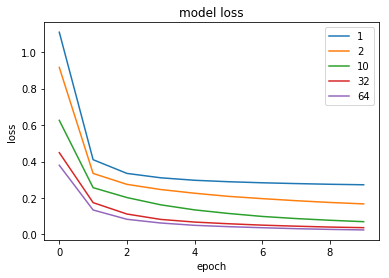

In [9]:
# fit model with given number of nodes, returns test set accuracy
def evaluate_model3(n_nodes, x_train, y_train, x_test, y_test):
    # define model
    model3 = Sequential()
    model3.add(Conv2D(n_nodes, kernel_size=3, activation= 'relu', input_shape=(28,28,1)))
    model3.add(Flatten())
    model3.add(Dense(10, activation='softmax'))
    # compile model
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model on train set
    start_time = time.clock()
    history3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=epochs, batch_size=batch_size, verbose=2)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    print("nodes=%d: Processing time (seconds): %f" % (n_nodes, runtime))
    # evaluate model on test set
    _, test_acc = model3.evaluate(x_test, y_test, verbose=0)
    return history3, test_acc
   
# evaluate model and plot learning curve with given number of nodes
for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history3, result = evaluate_model3(n_nodes, x_train, y_train, x_test, y_test)
    # summarize final test set accuracy
    print('nodes=%d: Test accuracy: %.3f' % (n_nodes, result))
    # plot learning curve
    pyplot.plot(history3.history['loss'], label=str(n_nodes))
    # show the plot
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
pyplot.legend()
pyplot.show()

## test number of layers in simple, convolutional model

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 23s - loss: 0.7488 - acc: 0.8313 - val_loss: 0.2650 - val_acc: 0.9262
Epoch 2/10
 - 23s - loss: 0.2236 - acc: 0.9375 - val_loss: 0.1683 - val_acc: 0.9537
Epoch 3/10
 - 23s - loss: 0.1518 - acc: 0.9578 - val_loss: 0.1302 - val_acc: 0.9639
Epoch 4/10
 - 23s - loss: 0.1135 - acc: 0.9693 - val_loss: 0.1015 - val_acc: 0.9714
Epoch 5/10
 - 23s - loss: 0.0925 - acc: 0.9753 - val_loss: 0.0868 - val_acc: 0.9756
Epoch 6/10
 - 23s - loss: 0.0780 - acc: 0.9789 - val_loss: 0.0777 - val_acc: 0.9770
Epoch 7/10
 - 23s - loss: 0.0676 - acc: 0.9817 - val_loss: 0.0702 - val_acc: 0.9786
Epoch 8/10
 - 23s - loss: 0.0603 - acc: 0.9833 - val_loss: 0.0663 - val_acc: 0.9785
Epoch 9/10
 - 23s - loss: 0.0543 - acc: 0.9850 - val_loss: 0.0645 - val_acc: 0.9796
Epoch 10/10
 - 23s - loss: 0.0495 - acc: 0.9861 - val_loss: 0.0612 - val_acc: 0.9803
layers=1: Processing time (seconds): 232.090682
layers=1: Test accuracy: 0.980
Train on 60000 samples, valida

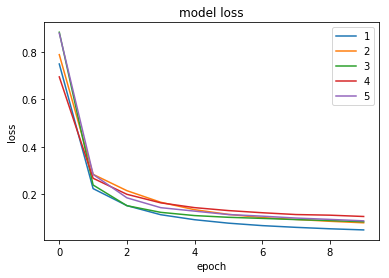

In [8]:
# fit model with given number of layers, returns test set accuracy
def evaluate_model4(n_layers, x_train, y_train, x_test, y_test):
       # define model
    model4 = Sequential()
    model4.add(Conv2D(10, kernel_size=3, activation= 'relu', input_shape=(28,28,1)))
    for _ in range(1, n_layers):
         model4.add(Conv2D(3, kernel_size=3, activation= 'relu', input_shape=(28,28,1)))
    model4.add(Flatten())
    model4.add(Dense(10, activation='softmax'))
    # compile model
    model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model on train set
    start_time = time.clock()
    history4 = model4.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=epochs, batch_size=batch_size, verbose=2)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    print("layers=%d: Processing time (seconds): %f" % (n_layers, runtime))
    # evaluate model on test set
    _, test_acc = model4.evaluate(x_test, y_test, verbose=0)
    return history4, test_acc       

# evaluate model and plot learning curve of model with given number of layers
all_history = list()
for n_layers in num_layers:
    # evaluate model with a given number of layers
    history4, result = evaluate_model4(n_layers, x_train, y_train, x_test, y_test)
    print('layers=%d: Test accuracy: %.3f' % (n_layers, result))
    # plot learning curve
    pyplot.plot(history4.history['loss'], label=str(n_layers))
   # show the plot
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
pyplot.legend()
pyplot.show()

## test number of nodes in simple, convolutional model with maxpooling 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 17s - loss: 1.8059 - acc: 0.4971 - val_loss: 0.9957 - val_acc: 0.7805
Epoch 2/10
 - 16s - loss: 0.6926 - acc: 0.8196 - val_loss: 0.4954 - val_acc: 0.8666
Epoch 3/10
 - 16s - loss: 0.4610 - acc: 0.8696 - val_loss: 0.3946 - val_acc: 0.8917
Epoch 4/10
 - 16s - loss: 0.3929 - acc: 0.8864 - val_loss: 0.3527 - val_acc: 0.9015
Epoch 5/10
 - 17s - loss: 0.3602 - acc: 0.8962 - val_loss: 0.3302 - val_acc: 0.9088
Epoch 6/10
 - 17s - loss: 0.3409 - acc: 0.9018 - val_loss: 0.3184 - val_acc: 0.9108
Epoch 7/10
 - 16s - loss: 0.3283 - acc: 0.9053 - val_loss: 0.3079 - val_acc: 0.9120
Epoch 8/10
 - 16s - loss: 0.3184 - acc: 0.9084 - val_loss: 0.3006 - val_acc: 0.9139
Epoch 9/10
 - 16s - loss: 0.3116 - acc: 0.9102 - val_loss: 0.2952 - val_acc: 0.9149
Epoch 10/10
 - 16s - loss: 0.3064 - acc: 0.9120 - val_loss: 0.2921 - val_acc: 0.9142
nodes=1: Processing time (seconds): 163.338072
nodes=1: Test accuracy: 0.914
Train on 60000 samples, validate

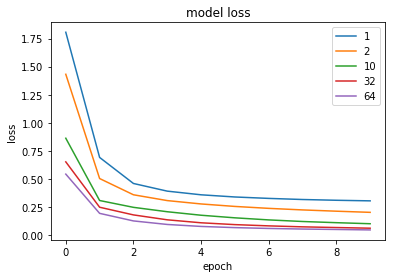

In [8]:
# fit model with given number of nodes, returns test set accuracy
def evaluate_model5(n_nodes, x_train, y_train, x_test, y_test):
    # define model
    model5 = Sequential()
    model5.add(Conv2D(n_nodes, kernel_size=3, activation= 'relu', input_shape=(28,28,1)))
    model5.add(MaxPooling2D(pool_size = (2, 2)))
    model5.add(Flatten())
    model5.add(Dense(10, activation='softmax'))
    # compile model
    model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model on train set
    start_time = time.clock()
    history5 = model5.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=epochs, batch_size=batch_size, verbose=2)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    print("nodes=%d: Processing time (seconds): %f" % (n_nodes, runtime))
    # evaluate model on test set
    _, test_acc = model5.evaluate(x_test, y_test, verbose=0)
    return history5, test_acc
   
# evaluate model and plot learning curve with given number of nodes
for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history5, result = evaluate_model5(n_nodes, x_train, y_train, x_test, y_test)
    # summarize final test set accuracy
    print('nodes=%d: Test accuracy: %.3f' % (n_nodes, result))
    # plot learning curve
    pyplot.plot(history5.history['loss'], label=str(n_nodes))
    # show the plot
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
pyplot.legend()
pyplot.show()

## test number of layers in simple, convolutional model with maxpooling

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 26s - loss: 1.9157 - acc: 0.4369 - val_loss: 1.2730 - val_acc: 0.7048
Epoch 2/10
 - 20s - loss: 0.8808 - acc: 0.7637 - val_loss: 0.6296 - val_acc: 0.8277
Epoch 3/10
 - 21s - loss: 0.5667 - acc: 0.8354 - val_loss: 0.4932 - val_acc: 0.8589
Epoch 4/10
 - 23s - loss: 0.4775 - acc: 0.8586 - val_loss: 0.4393 - val_acc: 0.8723
Epoch 5/10
 - 22s - loss: 0.4371 - acc: 0.8695 - val_loss: 0.4130 - val_acc: 0.8809
Epoch 6/10
 - 21s - loss: 0.4129 - acc: 0.8760 - val_loss: 0.3949 - val_acc: 0.8853
Epoch 7/10
 - 21s - loss: 0.3961 - acc: 0.8815 - val_loss: 0.3823 - val_acc: 0.8902
Epoch 8/10
 - 24s - loss: 0.3840 - acc: 0.8848 - val_loss: 0.3740 - val_acc: 0.8910
Epoch 9/10
 - 22s - loss: 0.3742 - acc: 0.8881 - val_loss: 0.3598 - val_acc: 0.8964
Epoch 10/10
 - 21s - loss: 0.3652 - acc: 0.8908 - val_loss: 0.3528 - val_acc: 0.8972
layers=1: Processing time (seconds): 221.538525
layers=1: Test accuracy: 0.897
Train on 60000 samples, valida

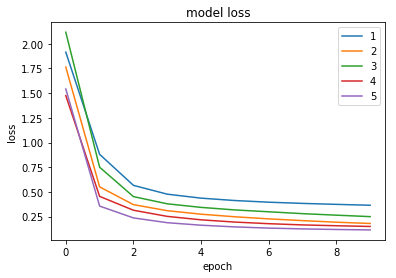

In [8]:
# fit model with given number of layers, returns test set accuracy
def evaluate_model6(n_layers, x_train, y_train, x_test, y_test):
       # define model
    model6 = Sequential()
    model6.add(Conv2D(3, kernel_size=3, activation= 'relu', padding='same', input_shape=(28,28,1)))
    for _ in range(1, n_layers):
        model6.add(Conv2D(3, kernel_size=3, activation= 'relu', padding='same', input_shape=(28,28,1)))
    model6.add(MaxPooling2D(pool_size = (2, 2)))
    model6.add(Flatten())
    model6.add(Dense(10, activation='softmax'))
    # compile model
    model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model on train set
    start_time = time.clock()
    history6 = model6.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=epochs, batch_size=batch_size, verbose=2)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    print("layers=%d: Processing time (seconds): %f" % (n_layers, runtime))
    # evaluate model on test set
    _, test_acc = model6.evaluate(x_test, y_test, verbose=0)
    return history6, test_acc       

# evaluate model and plot learning curve of model with given number of layers
all_history = list()
for n_layers in num_layers:
    # evaluate model with a given number of layers
    history6, result = evaluate_model6(n_layers, x_train, y_train, x_test, y_test)
    print('layers=%d: Test accuracy: %.3f' % (n_layers, result))
    # plot learning curve
    pyplot.plot(history6.history['loss'], label=str(n_layers))
   # show the plot
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
pyplot.legend()
pyplot.show()

## test number of nodes in simple, convolutional model with maxpooling and dropout

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 17s - loss: 1.8774 - acc: 0.3937 - val_loss: 1.2432 - val_acc: 0.7085
Epoch 2/10
 - 16s - loss: 0.9949 - acc: 0.7061 - val_loss: 0.6352 - val_acc: 0.8316
Epoch 3/10
 - 16s - loss: 0.6944 - acc: 0.7821 - val_loss: 0.4776 - val_acc: 0.8662
Epoch 4/10
 - 17s - loss: 0.5924 - acc: 0.8134 - val_loss: 0.4176 - val_acc: 0.8787
Epoch 5/10
 - 16s - loss: 0.5524 - acc: 0.8259 - val_loss: 0.3874 - val_acc: 0.8892
Epoch 6/10
 - 16s - loss: 0.5211 - acc: 0.8365 - val_loss: 0.3673 - val_acc: 0.8959
Epoch 7/10
 - 16s - loss: 0.5049 - acc: 0.8416 - val_loss: 0.3546 - val_acc: 0.8984
Epoch 8/10
 - 16s - loss: 0.4937 - acc: 0.8462 - val_loss: 0.3488 - val_acc: 0.9002
Epoch 9/10
 - 16s - loss: 0.4856 - acc: 0.8497 - val_loss: 0.3400 - val_acc: 0.9041
Epoch 10/10
 - 16s - loss: 0.4802 - acc: 0.8504 - val_loss: 0.3368 - val_acc: 0.9038
nodes=1: Processing time (seconds): 164.022181
nodes=1: Test accuracy: 0.904
Train on 60000 samples, validate

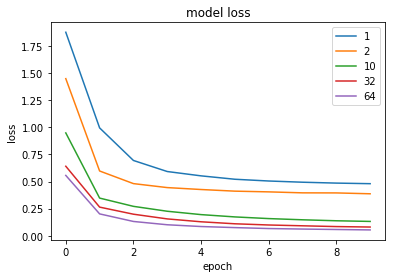

In [10]:
# fit model with given number of nodes, returns test set accuracy
def evaluate_model7(n_nodes, x_train, y_train, x_test, y_test):
    # define model
    model7 = Sequential()
    model7.add(Conv2D(n_nodes, kernel_size=3, activation= 'relu', input_shape=(28,28,1)))
    model7.add(MaxPooling2D(pool_size = (2, 2)))
    model7.add(Dropout(0.25))
    model7.add(Flatten())
    model7.add(Dense(10, activation='softmax'))
    # compile model
    model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model on train set
    start_time = time.clock()
    history7 = model7.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=epochs, batch_size=batch_size, verbose=2)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    print("nodes=%d: Processing time (seconds): %f" % (n_nodes, runtime))
    # evaluate model on test set
    _, test_acc = model7.evaluate(x_test, y_test, verbose=0)
    return history7, test_acc
   
# evaluate model and plot learning curve with given number of nodes
for n_nodes in num_nodes:
    # evaluate model with a given number of nodes
    history7, result = evaluate_model7(n_nodes, x_train, y_train, x_test, y_test)
    # summarize final test set accuracy
    print('nodes=%d: Test accuracy: %.3f' % (n_nodes, result))
    # plot learning curve
    pyplot.plot(history7.history['loss'], label=str(n_nodes))
    # show the plot
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
pyplot.legend()
pyplot.show()

## test number of layers in simple, convolutional model with maxpooling and dropout

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 20s - loss: 1.4058 - acc: 0.6189 - val_loss: 0.5440 - val_acc: 0.8671
Epoch 2/10
 - 19s - loss: 0.5021 - acc: 0.8521 - val_loss: 0.3578 - val_acc: 0.9030
Epoch 3/10
 - 20s - loss: 0.4116 - acc: 0.8756 - val_loss: 0.3118 - val_acc: 0.9144
Epoch 4/10
 - 19s - loss: 0.3771 - acc: 0.8864 - val_loss: 0.2902 - val_acc: 0.9173
Epoch 5/10
 - 19s - loss: 0.3570 - acc: 0.8924 - val_loss: 0.2743 - val_acc: 0.9217
Epoch 6/10
 - 20s - loss: 0.3380 - acc: 0.9002 - val_loss: 0.2597 - val_acc: 0.9281
Epoch 7/10
 - 20s - loss: 0.3254 - acc: 0.9033 - val_loss: 0.2504 - val_acc: 0.9307
Epoch 8/10
 - 19s - loss: 0.3127 - acc: 0.9063 - val_loss: 0.2401 - val_acc: 0.9336
Epoch 9/10
 - 19s - loss: 0.3024 - acc: 0.9110 - val_loss: 0.2300 - val_acc: 0.9376
Epoch 10/10
 - 19s - loss: 0.2929 - acc: 0.9140 - val_loss: 0.2235 - val_acc: 0.9378
layers=1: Processing time (seconds): 194.785968
layers=1: Test accuracy: 0.938
Train on 60000 samples, valida

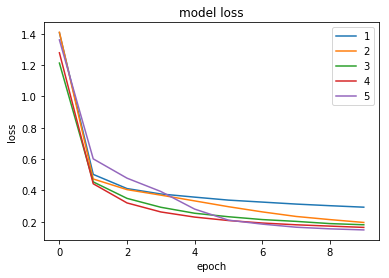

In [8]:
# fit model with given number of layers, returns test set accuracy
def evaluate_model8(n_layers, x_train, y_train, x_test, y_test):
       # define model
    model8 = Sequential()
    model8.add(Conv2D(3, kernel_size=3, activation= 'relu', input_shape=(28,28,1)))
    for _ in range(1, n_layers):
        model8.add(Conv2D(3, kernel_size=3, activation= 'relu', input_shape=(28,28,1)))
    model8.add(MaxPooling2D(pool_size = (2, 2)))
    model8.add(Dropout(0.25))
    model8.add(Flatten())
    model8.add(Dense(10, activation='softmax'))
    # compile model
    model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model on train set
    start_time = time.clock()
    history8 = model8.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=epochs, batch_size=batch_size, verbose=2)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    print("layers=%d: Processing time (seconds): %f" % (n_layers, runtime))
    # evaluate model on test set
    _, test_acc = model8.evaluate(x_test, y_test, verbose=0)
    return history8, test_acc       

# evaluate model and plot learning curve of model with given number of layers
all_history = list()
for n_layers in num_layers:
    # evaluate model with a given number of layers
    history8, result = evaluate_model8(n_layers, x_train, y_train, x_test, y_test)
    print('layers=%d: Test accuracy: %.3f' % (n_layers, result))
    # plot learning curve
    pyplot.plot(history8.history['loss'], label=str(n_layers))
   # show the plot
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
pyplot.legend()
pyplot.show()

## CNN models with different activations in hidden layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 83s - loss: 0.3930 - acc: 0.8910 - val_loss: 0.1757 - val_acc: 0.9509
Epoch 2/10
 - 73s - loss: 0.1302 - acc: 0.9635 - val_loss: 0.0980 - val_acc: 0.9722
Epoch 3/10
 - 72s - loss: 0.0804 - acc: 0.9776 - val_loss: 0.0719 - val_acc: 0.9771
Epoch 4/10
 - 75s - loss: 0.0615 - acc: 0.9830 - val_loss: 0.0628 - val_acc: 0.9803
Epoch 5/10
 - 73s - loss: 0.0493 - acc: 0.9863 - val_loss: 0.0635 - val_acc: 0.9798
Epoch 6/10
 - 72s - loss: 0.0420 - acc: 0.9879 - val_loss: 0.0551 - val_acc: 0.9819
Epoch 7/10
 - 71s - loss: 0.0358 - acc: 0.9900 - val_loss: 0.0560 - val_acc: 0.9823
Epoch 8/10
 - 73s - loss: 0.0315 - acc: 0.9910 - val_loss: 0.0548 - val_acc: 0.9826
Epoch 9/10
 - 72s - loss: 0.0269 - acc: 0.9928 - val_loss: 0.0587 - val_acc: 0.9825
Epoch 10/10
 - 71s - loss: 0.0242 - acc: 0.9932 - val_loss: 0.0581 - val_acc: 0.9820
activation=relu:  Processing time (seconds): 735.711690
activation=relu:  Test accuracy: 0.982
Train on 60000

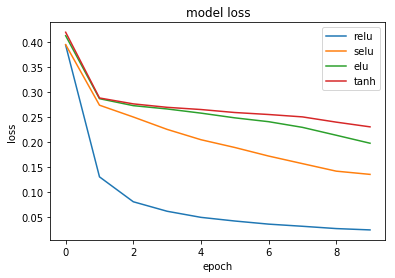

In [8]:

activation_type = ['relu','selu', 'elu', 'tanh']


# fit model with given types of activations in hidden layer, returns test set accuracy
def evaluate_model9(n_act, x_train, y_train, x_test, y_test):
    # define model
    model9 = Sequential()
    model9.add(Conv2D(64, kernel_size=3, activation= n_act, input_shape=(28,28,1)))
    model9.add(Flatten())
    model9.add(Dense(10, activation='softmax'))
    # compile model
    model9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model on train set
    start_time = time.clock()
    history9 = model9.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=epochs, batch_size=batch_size, verbose=2)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    print("activation=%s:  Processing time (seconds): %f" % (n_act, runtime)) 
    # evaluate model on test set
    _, test_acc = model9.evaluate(x_test, y_test, verbose=0)
    return history9, test_acc
              
# evaluate model and plot learning curve with given number of nodes

for n_act in activation_type:
    # evaluate model with a given number of nodes
    history9, result = evaluate_model9(n_act, x_train, y_train, x_test, y_test)
    # summarize final test set accuracy
    print('activation=%s:  Test accuracy: %.3f' % (n_act, result))
    # plot learning curve
    pyplot.plot(history9.history['loss'], label=str(n_act))
    # show the plot
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
pyplot.legend()
pyplot.show()

## Dense models with different activations in hidden layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 66s - loss: 0.5074 - acc: 0.8646 - val_loss: 0.3121 - val_acc: 0.9091
Epoch 2/10
 - 66s - loss: 0.2991 - acc: 0.9149 - val_loss: 0.2731 - val_acc: 0.9223
Epoch 3/10
 - 66s - loss: 0.2778 - acc: 0.9218 - val_loss: 0.2713 - val_acc: 0.9233
Epoch 4/10
 - 66s - loss: 0.2700 - acc: 0.9248 - val_loss: 0.2653 - val_acc: 0.9248
Epoch 5/10
 - 66s - loss: 0.2633 - acc: 0.9262 - val_loss: 0.2669 - val_acc: 0.9238
Epoch 6/10
 - 66s - loss: 0.2614 - acc: 0.9274 - val_loss: 0.2682 - val_acc: 0.9273
Epoch 7/10
 - 66s - loss: 0.2562 - acc: 0.9288 - val_loss: 0.2694 - val_acc: 0.9253
Epoch 8/10
 - 67s - loss: 0.2541 - acc: 0.9291 - val_loss: 0.2802 - val_acc: 0.9224
Epoch 9/10
 - 66s - loss: 0.2513 - acc: 0.9306 - val_loss: 0.2706 - val_acc: 0.9238
Epoch 10/10
 - 66s - loss: 0.2510 - acc: 0.9302 - val_loss: 0.2679 - val_acc: 0.9250
activation=relu:  Processing time (seconds): 662.033396
activation=relu:  Test accuracy: 0.925
Train on 60000

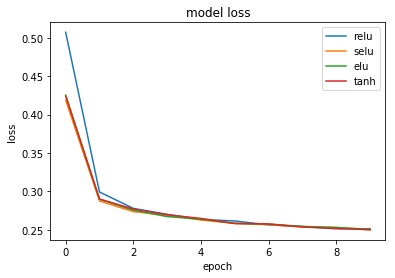

In [9]:
activation_type = ['relu','selu', 'elu', 'tanh']


# fit model with given type of activations in hidden layer, returns test set accuracy
def evaluate_model10(n_act, x_train, y_train, x_test, y_test):
    # define model
    model10 = Sequential()
    model10.add(Dense(64, activation= n_act, input_shape=(28,28,1)))
    model10.add(Flatten())
    model10.add(Dense(10, activation='softmax'))
    # compile model
    model10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model on train set
    start_time = time.clock()
    history10 = model10.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=epochs, batch_size=batch_size, verbose=2)
    end_time = time.clock()
    runtime = end_time - start_time  # seconds of wall-clock time
    print("activation=%s:  Processing time (seconds): %f" % (n_act, runtime)) 
    # evaluate model on test set
    _, test_acc = model10.evaluate(x_test, y_test, verbose=0)
    return history10, test_acc
              
# evaluate model and plot learning curve with given number of nodes

for n_act in activation_type:
    # evaluate model with a given number of nodes
    history10, result = evaluate_model10(n_act, x_train, y_train, x_test, y_test)
    # summarize final test set accuracy
    print('activation=%s:  Test accuracy: %.3f' % (n_act, result))
    # plot learning curve
    pyplot.plot(history10.history['loss'], label=str(n_act))
    # show the plot
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
pyplot.legend()
pyplot.show()

## Model with three, hidden convolutional layers

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 124s - loss: 0.5527 - acc: 0.8549 - val_loss: 0.1800 - val_acc: 0.9480
Epoch 2/10
 - 117s - loss: 0.1371 - acc: 0.9606 - val_loss: 0.0926 - val_acc: 0.9720
Epoch 3/10
 - 111s - loss: 0.0852 - acc: 0.9751 - val_loss: 0.0724 - val_acc: 0.9775
Epoch 4/10
 - 122s - loss: 0.0666 - acc: 0.9809 - val_loss: 0.0561 - val_acc: 0.9821
Epoch 5/10
 - 118s - loss: 0.0553 - acc: 0.9832 - val_loss: 0.0575 - val_acc: 0.9816
Epoch 6/10
 - 120s - loss: 0.0485 - acc: 0.9853 - val_loss: 0.0509 - val_acc: 0.9836
Epoch 7/10
 - 123s - loss: 0.0440 - acc: 0.9867 - val_loss: 0.0540 - val_acc: 0.9836
Epoch 8/10
 - 116s - loss: 0.0360 - acc: 0.9889 - val_loss: 0.0489 - val_acc: 0.9843
Epoch 9/10
 - 124s - loss: 0.0341 - acc: 0.9892 - val_loss: 0.0543 - val_acc: 0.9829
Epoch 10/10
 - 123s - loss: 0.0305 - acc: 0.9904 - val_loss: 0.0491 - val_acc: 0.9852


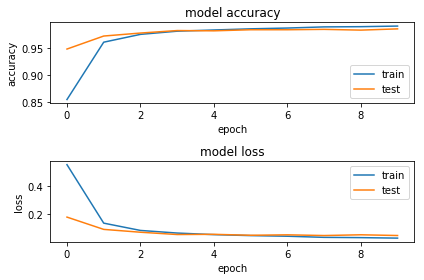

In [8]:
final = Sequential()
final.add(Conv2D(10, kernel_size=3, activation= 'relu', input_shape=(28,28,1)))
final.add(Conv2D(10, kernel_size=3, activation= 'relu', input_shape=(28,28,1)))
final.add(Conv2D(10, kernel_size=3, activation= 'relu', input_shape=(28,28,1)))
final.add(Flatten())
final.add(Dense(10, activation='softmax'))
# compile model
final.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model on train set
finalhistory = final.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=epochs, batch_size=batch_size, verbose=2)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(finalhistory.history['acc'])
plt.plot(finalhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(finalhistory.history['loss'])
plt.plot(finalhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

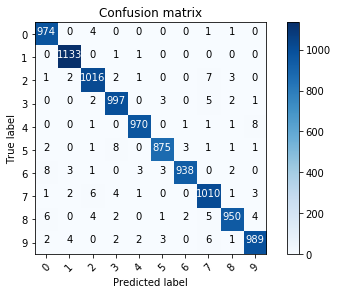

In [9]:
# Predict the values from the validation dataset
Y_pred = final.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

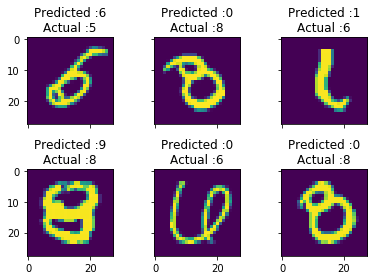

In [10]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted :{}\nActual :{}".format(pred_errors[error],obs_errors[error]))
            fig.tight_layout()
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

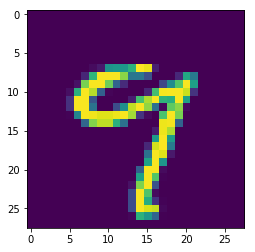

In [11]:
test_im = x_train[154]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')

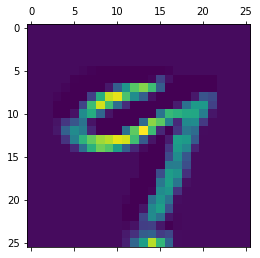

In [12]:
from keras import models
layer_outputs = [layer.output for layer in final.layers[:8]]
activation_model = models.Model(inputs=final.input, outputs=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')



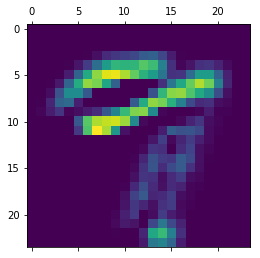

In [13]:
second_layer_activation = activations[1]
plt.matshow(second_layer_activation[0, :, :, 4], cmap='viridis')

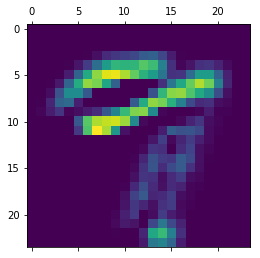

In [14]:
third_layer_activation = activations[2]
plt.matshow(second_layer_activation[0, :, :, 4], cmap='viridis')

In [16]:
final.layers[:-1]# Dropping The Last Dense Layer

In [22]:


layer_names = []
for layer in final.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('drop'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')



In [23]:
from keras.models import Model
layer_outputs = [layer.output for layer in final.layers]
activation_model = Model(inputs=final.input, outputs=layer_outputs)
activations = activation_model.predict(x_train[10].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
        
        
      



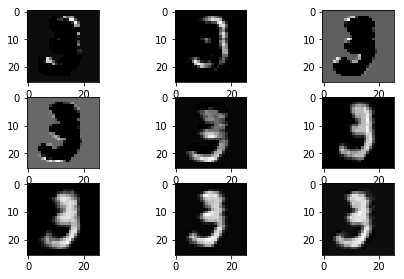

In [39]:
display_activation(activations, 3, 3, 0)

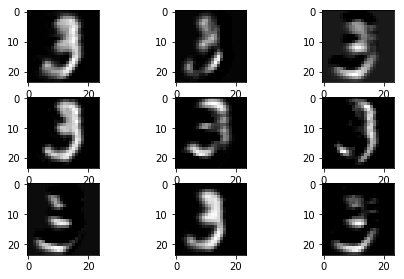

In [34]:
#display output of layer 2
display_activation(activations, 3, 3, 1)

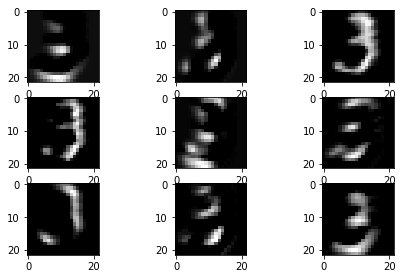

In [35]:
#display output of layer 3
display_activation(activations, 3, 3, 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 73s - loss: 0.3883 - acc: 0.8918 - val_loss: 0.1751 - val_acc: 0.9516
Epoch 2/10
 - 73s - loss: 0.1352 - acc: 0.9626 - val_loss: 0.0996 - val_acc: 0.9703
Epoch 3/10
 - 72s - loss: 0.0828 - acc: 0.9774 - val_loss: 0.0744 - val_acc: 0.9771
Epoch 4/10
 - 72s - loss: 0.0618 - acc: 0.9828 - val_loss: 0.0658 - val_acc: 0.9803
Epoch 5/10
 - 71s - loss: 0.0514 - acc: 0.9851 - val_loss: 0.0578 - val_acc: 0.9820
Epoch 6/10
 - 71s - loss: 0.0431 - acc: 0.9879 - val_loss: 0.0559 - val_acc: 0.9819
Epoch 7/10
 - 71s - loss: 0.0377 - acc: 0.9897 - val_loss: 0.0558 - val_acc: 0.9826
Epoch 8/10
 - 71s - loss: 0.0319 - acc: 0.9915 - val_loss: 0.0551 - val_acc: 0.9822
Epoch 9/10
 - 71s - loss: 0.0284 - acc: 0.9920 - val_loss: 0.0535 - val_acc: 0.9820
Epoch 10/10
 - 71s - loss: 0.0251 - acc: 0.9931 - val_loss: 0.0541 - val_acc: 0.9823


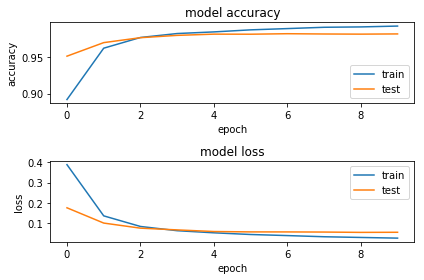

In [8]:

#alternative model with 1 layer
final = Sequential()
final.add(Conv2D(64, kernel_size=3, activation= 'relu', input_shape=(28,28,1)))
final.add(Flatten())
final.add(Dense(10, activation='softmax'))
# compile model
final.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model on train set
finalhistory = final.fit(x_train, y_train, validation_data=(x_test, y_test), 
                    epochs=epochs, batch_size=batch_size, verbose=2)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(finalhistory.history['acc'])
plt.plot(finalhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(finalhistory.history['loss'])
plt.plot(finalhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()